In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/Colab Notebooks/matrix_two/DW_Matrix_car

/content/drive/MyDrive/Colab Notebooks/matrix_two/DW_Matrix_car


In [4]:
ls

data/  day1.ipynb  day2_visualization.ipynb  LICENSE  README.md


In [7]:
df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

In [8]:
df.sample(5)

,breadcrumb,created_at,price_currency,price_details,price_value,seller_address,seller_name,seller_type,feature_czujniki-parkowania-przednie,feature_poduszka-powietrzna-chroniąca-kolana,...,param_pearl,param_stan,param_wersja,param_emisja-co2,param_body-type,param_matowy,param_bezwypadkowy,param_akryl-(niemetalizowany),param_monthly-payment-value,car_id
51141,"[Osobowe, Audi, A4, Audi A4 B5 (1995-2001)]","11:07, 23 lutego 2018",PLN,"Cena Brutto, Do negocjacji",7400.0,"Warszawska 21 - 33-200 Dąbrowa Tarnowska, dąbr...",LUCAS-CARS,Dealer,False,False,...,None,Używane,B5 (1995-2001),None,None,None,Tak,None,None,51141
72258,"[Osobowe, Lexus, RX, Lexus RX IV (2015-)]","13:48, 3 marca 2018",PLN,"Cena Brutto, Faktura VAT",214900.0,"M. Skłodowskiej-Curie 1-3 - 87-100 Toruń, Kuja...",BEDNARSCY SPJ,Dealer,True,True,...,None,Używane,IV (2015-),None,None,None,Tak,None,None,72258
62194,"[Osobowe, Renault, Clio, Renault Clio IV (2012-)]","12:36, 5 marca 2018",PLN,"Cena Brutto, Faktura VAT",45100.0,"ul. Wolności 59 - 41-804 Zabrze, Śląskie (Polska)",Dąbrowscy sp. z o.o. - Autoryzowany Dealer Ren...,Dealer,False,False,...,None,Nowe,IV (2012-),127 g/km,None,None,Tak,None,None,62194
135763,"[Osobowe, Lexus, CT]","19:18, 5 marca 2018",PLN,"Cena Brutto, Do negocjacji",61900.0,"Tarnobrzeg, Podkarpackie",None,Osoba prywatna,True,True,...,None,Używane,None,None,None,None,Tak,None,None,135763
96395,"[Osobowe, Mercedes-Benz, W124 (1984-1993)]","19:23, 28 lutego 2018",PLN,"Cena Brutto, Do negocjacji",6700.0,"Radom, Mazowieckie",None,Osoba prywatna,False,False,...,None,Używane,None,None,None,None,None,None,None,96395


In [10]:
df.columns.values

array(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa',
       'feature_światła-led', 'feature_czujnik-zmierzchu',
       'feature_elektrycznie-ustawiane-lusterka',
       'feature_asr-(kontrola-trakcji)',
       'feature_poduszka-powietrzna-kierowcy', 'feature_cd',
       'feature_elektryczne-szyby-przednie',
       'feature_poduszka-powietrzna-pasażera',
       'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej',
       'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne',
       'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa',
       'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne',
       'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne',
       'feature_regulowane-zaw

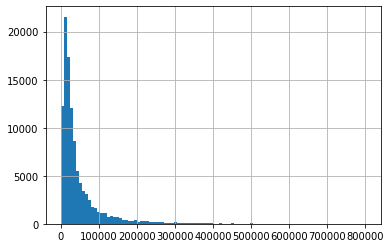

In [11]:
df['price_value'].hist(bins = 100)

In [12]:
df['price_value'].describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [61]:
def group_and_barplot(feat_groupby, feat_agg = 'price_value',agg_funcs =['mean','median','size'], feat_sort = 'size',subplots = True,top = 50 ):
  return (
    df[ [feat_groupby, feat_agg] ]
    .groupby(feat_groupby)[feat_agg]
    .agg(agg_funcs)
    .sort_values(by = feat_sort, ascending = False)
    .head(top)
  ).plot(kind = 'bar', figsize = (16,6),subplots = subplots)

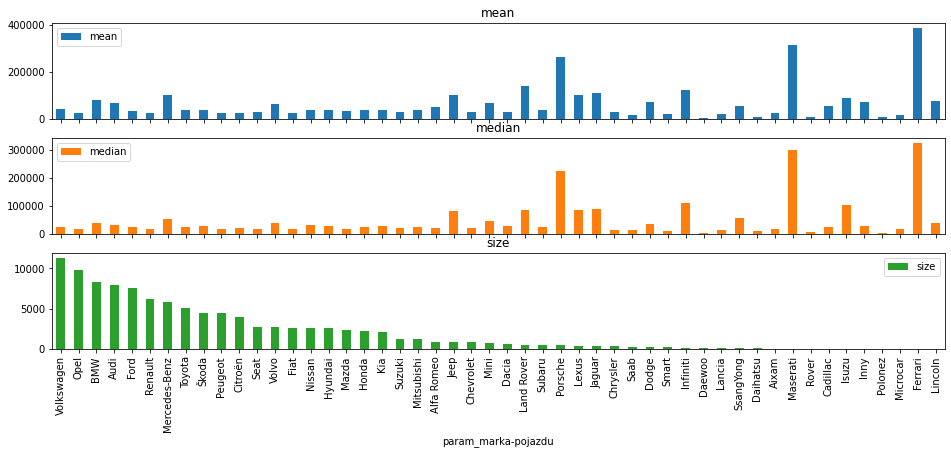

In [62]:
group_and_barplot('param_marka-pojazdu');

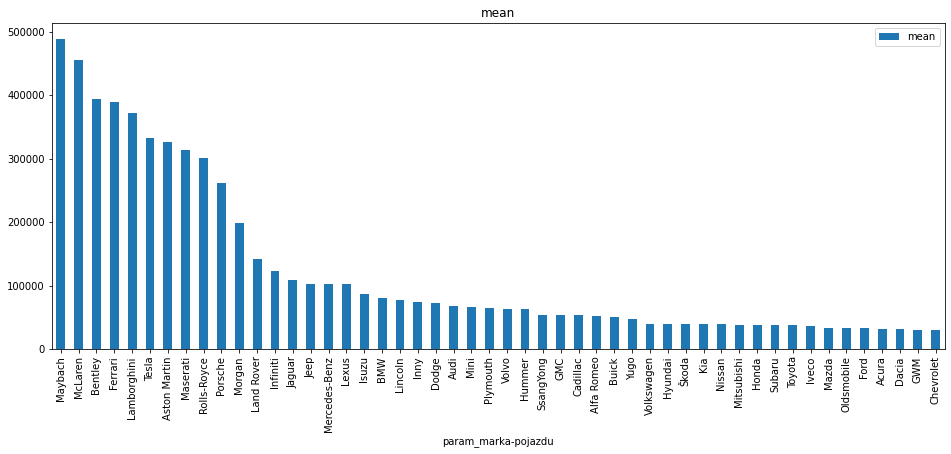

In [67]:
group_and_barplot('param_marka-pojazdu', agg_funcs =['mean'],feat_sort = 'mean');

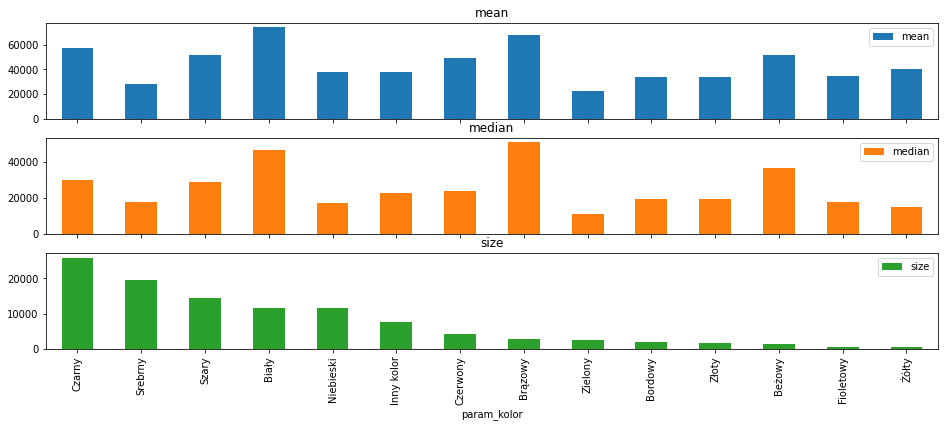

In [73]:
group_and_barplot('param_kolor');

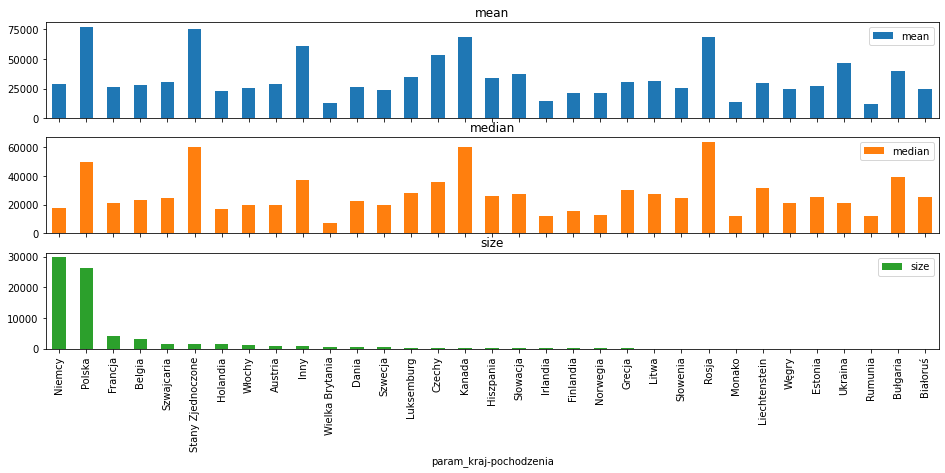

In [71]:
group_and_barplot('param_kraj-pochodzenia');

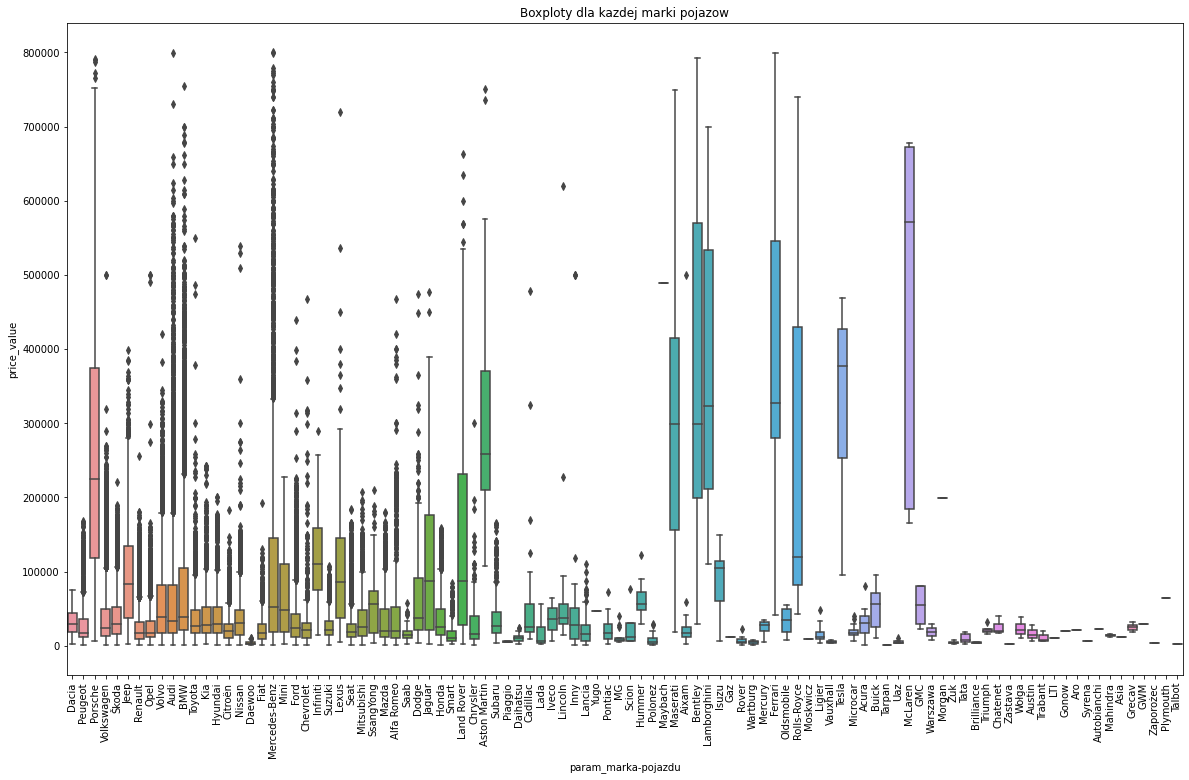

In [72]:
plt.figure(figsize = (20,12))
ax = sns.boxplot(x = 'param_marka-pojazdu', y = 'price_value', data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Boxploty dla kazdej marki pojazow')
plt.show()